In [1]:
# Let's check that gaps makes more sense than tgapspercent

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim import maf

In [3]:
gap = 7.  # Hours
f = 'r'
sql = "filter='%s'" % f
healpixslicer = maf.slicers.HealpixSlicer()
plot_dict={'percentile_clip': 95}


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
run_1 = 'no_long_v3.2_10yrs.db'
run_name = run_1.replace('.db', '')



/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 491 bins, returning 200
  warnings.warn(


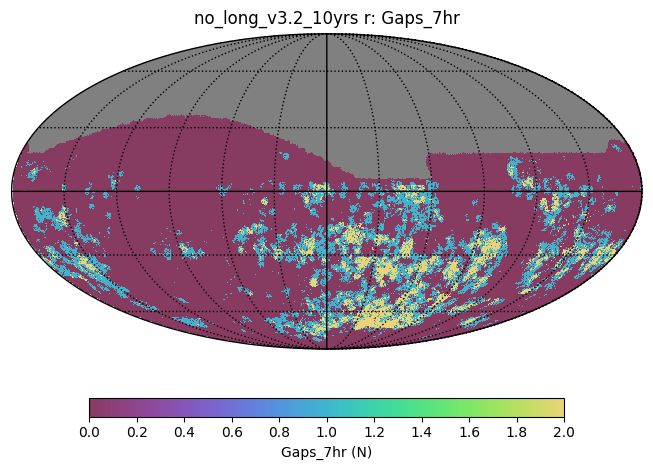

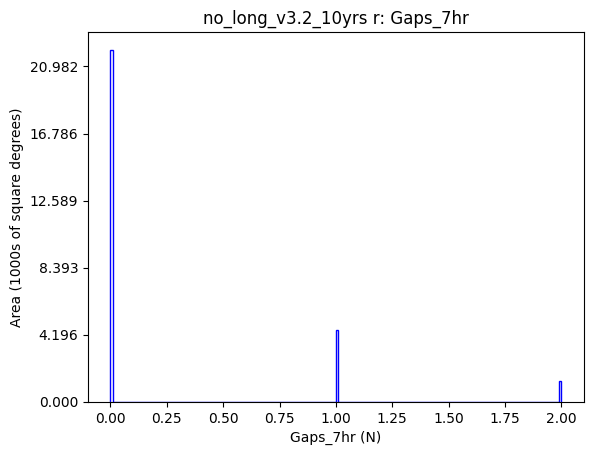

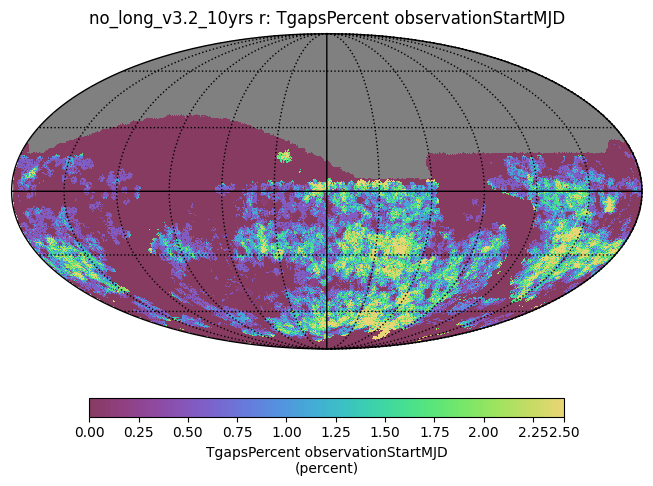

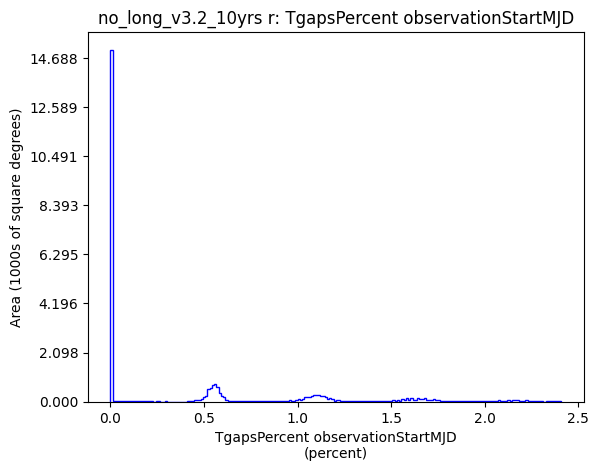

In [5]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )

bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [6]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 7hr in top 18k': 0.0, 'Mean N gaps in r at 7hr in top 18k': 0.4431324093394104, 'Mean': 0.28410746982549234, 'Median': 0.0}
{'Median TGP top 18k': 0.5780346820809248, 'Mean TGP top 18k': 0.8437375460538692, 'Mean': 0.5409492385435767, 'Median': 0.0}


In [7]:
run_1 = 'more_long_v3.2_10yrs.db'
run_name = run_1.replace('.db', '')



/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 620 bins, returning 200
  warnings.warn(


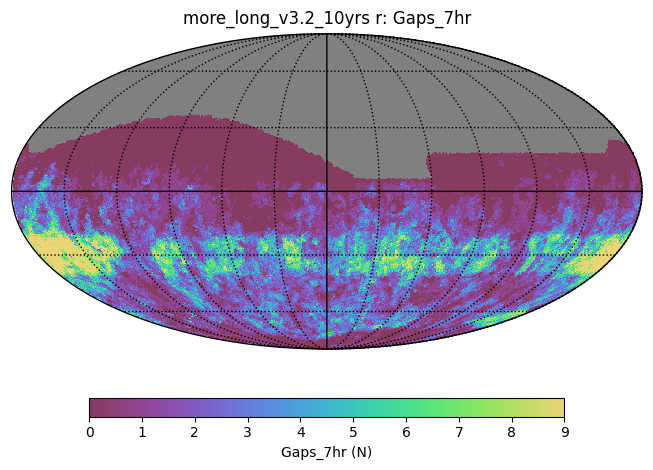

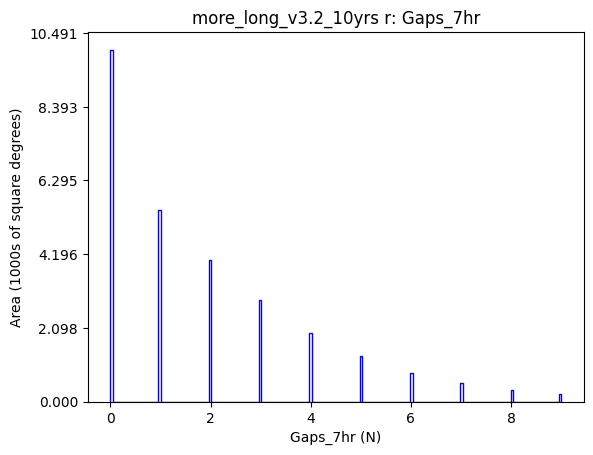

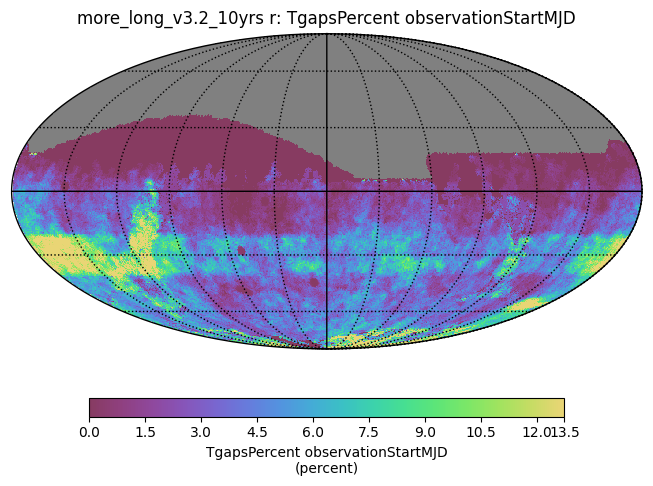

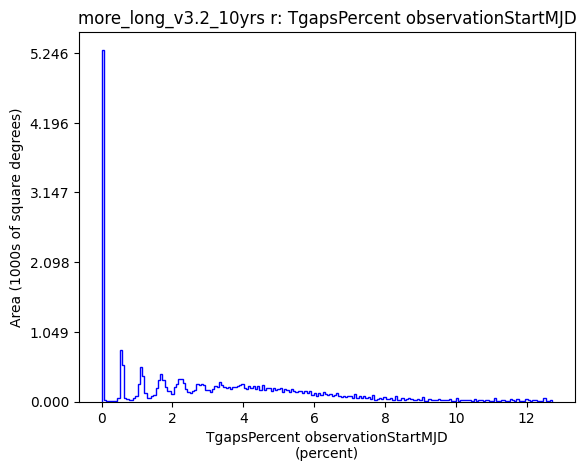

In [8]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [9]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 7hr in top 18k': 2.0, 'Mean N gaps in r at 7hr in top 18k': 3.128376094280019, 'Mean': 2.007531549571494, 'Median': 1.0}
{'Median TGP top 18k': 4.49438202247191, 'Mean TGP top 18k': 5.278380458971265, 'Mean': 3.5756187415591056, 'Median': 3.0303030303030303}


In [10]:
sql = "filter='%s' and night < %i" % (f, 365.25*5)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 307 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 501 bins, returning 200
  warnings.warn(


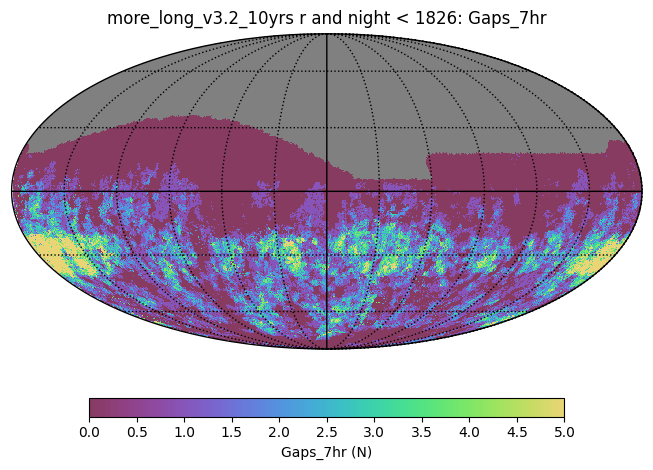

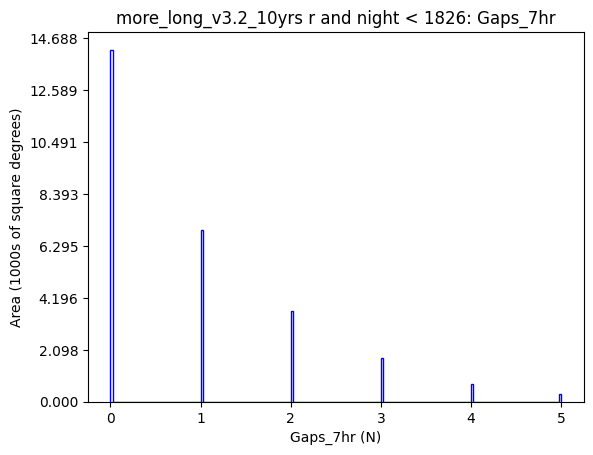

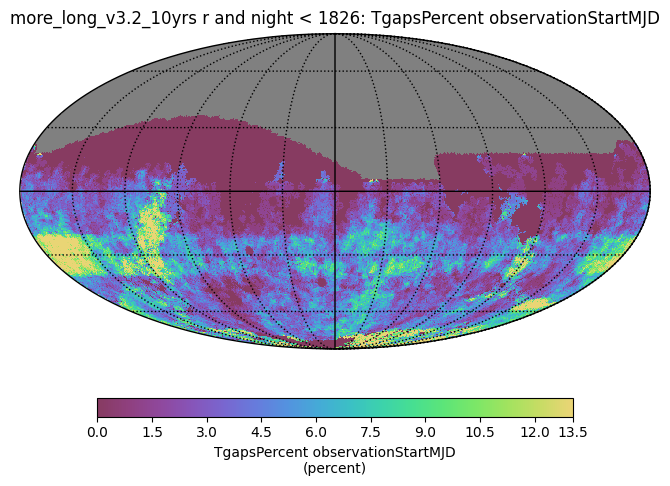

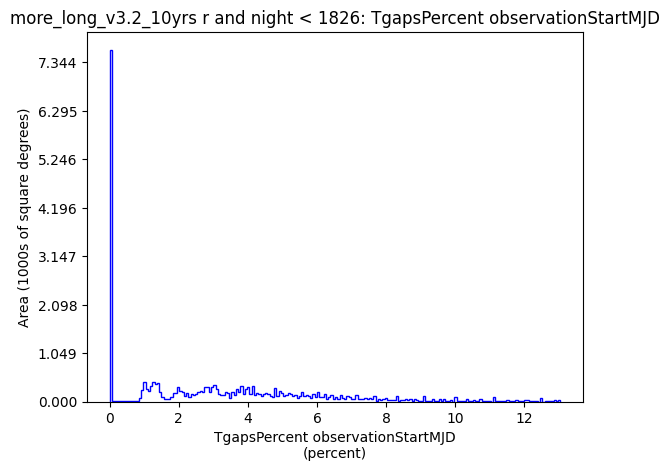

In [11]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )

bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [12]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 7hr in top 18k': 1.0, 'Mean N gaps in r at 7hr in top 18k': 1.496975066152214, 'Mean': 0.9620775679299985, 'Median': 0.0}
{'Median TGP top 18k': 4.301075268817205, 'Mean TGP top 18k': 5.197340176798335, 'Mean': 3.434985593355871, 'Median': 2.8169014084507045}


Both metrics show an increase in the area of the sky that passes near zenith (this is caused by the zenith avoidence zone). But as in the other notebook, `TgapsPercent` fails to notice when the survey length is cut in half.